1. Talking with ``Matlab``
===============
***

In [1]:
%load_ext pymatbridge
load_ext pymatbridge


Starting MATLAB on ZMQ socket tcp://127.0.0.1:48727
Send 'exit' command to kill the server
.......MATLAB started and connected!


d:\Miniconda\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [2]:
a = [1,2,3]

In [3]:
%%matlab -i a -o b
b = a + 3;

In [4]:
b

array([[ 4.,  5.,  6.]])

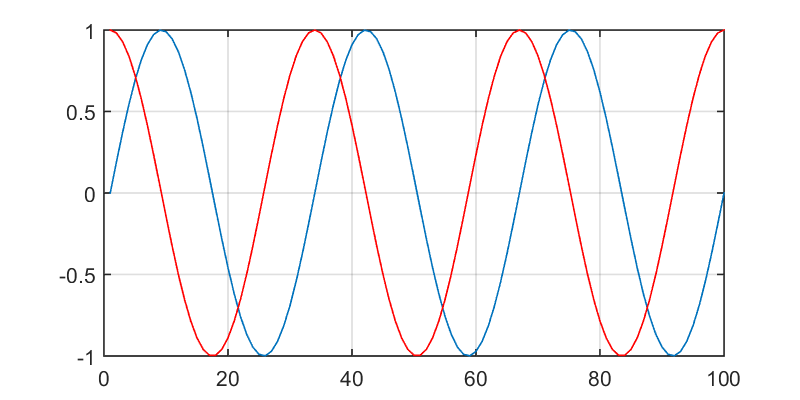

In [5]:
%%matlab --size 800,400 -o t
t = linspace(0,6*pi,100);
plot(sin(t))
grid on
hold on
plot(cos(t), 'r')
hold off

In [6]:
t[:, :50]

array([[ 0.        ,  0.19039955,  0.38079911,  0.57119866,  0.76159822,
         0.95199777,  1.14239733,  1.33279688,  1.52319644,  1.71359599,
         1.90399555,  2.0943951 ,  2.28479466,  2.47519421,  2.66559377,
         2.85599332,  3.04639288,  3.23679243,  3.42719199,  3.61759154,
         3.8079911 ,  3.99839065,  4.1887902 ,  4.37918976,  4.56958931,
         4.75998887,  4.95038842,  5.14078798,  5.33118753,  5.52158709,
         5.71198664,  5.9023862 ,  6.09278575,  6.28318531,  6.47358486,
         6.66398442,  6.85438397,  7.04478353,  7.23518308,  7.42558264,
         7.61598219,  7.80638175,  7.9967813 ,  8.18718085,  8.37758041,
         8.56797996,  8.75837952,  8.94877907,  9.13917863,  9.32957818]])

2. 使用 ``C/C++`` 加速
================
***

2.1 一个玩具例子
------------

In [7]:
def fib(n):
    """calculate the Fibonacci series up to n."""
    a, b = 0, 1
    while b < n:
        a, b = b, a + b
    return b

In [8]:
%timeit fib(50000000)

1000000 loops, best of 3: 1.56 µs per loop


2.2 使用 ``cython``
-------------------

In [9]:
%load_ext cython

In [10]:
%%cython

def fib_cython(int n):
    cdef int a = 0
    cdef int b = 1
    while b < n:
        a, b = b, a + b
    return  b

In [12]:
%timeit fib_cython(50000000)

The slowest run took 28.67 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 49.7 ns per loop


2.3 使用 ``numba``
--------------------

In [13]:
from numba import jit

In [14]:
fib_numba = jit(fib)

In [15]:
%timeit fib_numba(50000000)

The slowest run took 109559.54 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 191 ns per loop


3. 调用已有的dll库的函数
----------------------------

假设我们有一个已经编译好的dll库 ``cdll.dll``库，由如下的``c++``代码生成:

```c
// cdll.hpp

extern "C" __declspec(dllexport) int square_func(int magic);

// cdll.cpp

#include "cdll.hpp"

int square_func(int magic) { return magic * magic;}
```

In [16]:
from ctypes import CDLL

In [17]:
libc = CDLL('dll/cdll')

In [18]:
libc.square_func(2)

4